In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib notebook

In [2]:
N = 1000
I = 1
Rsi = 0.02/N

total = N + I

# SI Model transition rates
Q = np.zeros((N + I + 1, N + I + 1))

## For this model, when total - i = 0, i.e. there are no infectives then
## the rate of going anywhere is 0
for i in range(1, total): # Start at population 1 and only go up to total - 1
    Q[i, i] = - Rsi * i * (total - i)
    Q[i, i - 1] = Rsi * i * (total - i)

In [3]:
# Q matrix for when we are observing social distancing

DistQ = np.zeros((N + I + 1, N + I + 1))
c = 0.1
## For this model, when total - i = 0, i.e. there are no infectives then
## the rate of going anywhere is 0
for i in range(1, total): # Start at population 1 and only go up to total - 1
    DistQ[i, i] = - Rsi * i * (total - i) * c
    DistQ[i, i - 1] = Rsi * i * (total - i) * c

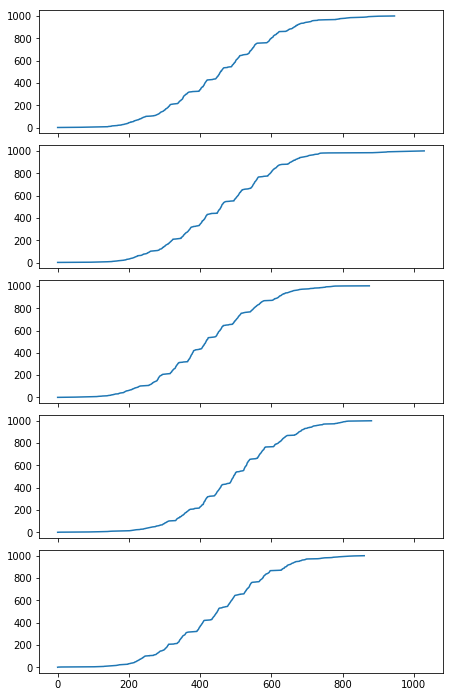

In [5]:
## Few questions:
### Should social distancing be implemented each time the number of infectives 
### passes a multiple of 100 or if it increases by a multiple of 100

def getTrajectories(N, Q, DistQ):
    I_t = [[0, I]]
    
    # Old population to which we compare to check if number of infectives 
    # has increased by 100
    old = N
    lastTime = 0
    state = N
    timeSpent = np.random.exponential(scale=1/(- np.diag(Q)[state]))
    state -= 1 # will only transition to a state with a lower number of susceptibles
    I_t.append([I_t[-1][0] + timeSpent, total - state])
    socDist = False

    while state != 0:
        if socDist:
            #print("Social Distancing")
            timeSpent = np.random.exponential(scale=1/(- np.diag(DistQ)[state]))
            state -= 1 # Will only transition to a state with a lower number of susceptibles
            I_t.append([I_t[-1][0] + timeSpent, total - state])
            if I_t[-1][0] - lastTime >= 20:
                socDist = False
                old = state # Remember the population now that we have stopped social distancing
        else:
            #print("No Social Distancing")
            timeSpent = np.random.exponential(scale=1/(- np.diag(Q)[state]))
            state -= 1 # will only transition to a state with a lower number of susceptibles
            I_t.append([I_t[-1][0] + timeSpent, total - state])
            if (old - state) % 100 == 0:
                socDist = True
                lastTime = I_t[-1][0] # Remember when we began social distancing

    return zip(*I_t)

fig, axes = plt.subplots(ncols=1, nrows=5, sharex=True, figsize=(7, 10))

for i in range(0, 5):
    times, infectives = getTrajectories(N, Q, DistQ)
    axes[i].plot(times, infectives)

plt.subplots_adjust(bottom=0.05, top=0.97, hspace=0.1, wspace=0.1, left=0.1, right=0.9)
plt.show()

<IPython.core.display.Javascript object>


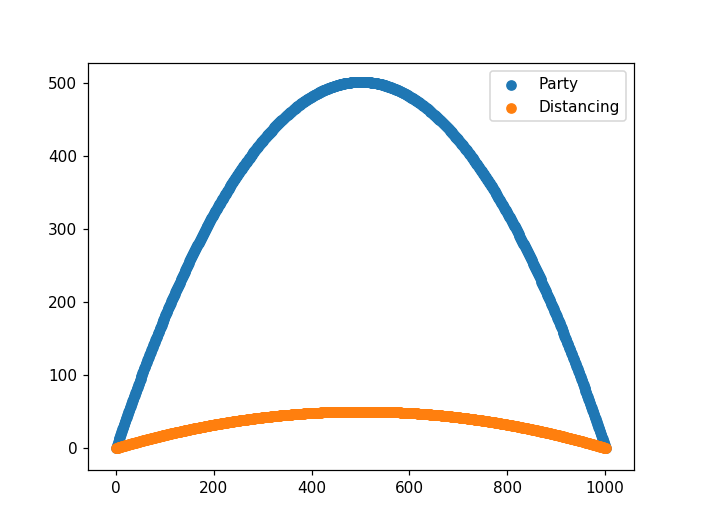

In [48]:
plt.figure()
plt.scatter(range(Q.shape[0]), (- np.diag(Q)), label="Party")
plt.scatter(range(Q.shape[0]), (- np.diag(DistQ)), label="Distancing")
plt.legend()